# Домашнее задание №14. Продолжение OpenCV

In [20]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

## Задание 1
Выбрать изображение, содержащее не менее 3-х одинаковых объектов. Составить изображение (шаблон) из точек, соответствующих положению объекта на изображении. Находя совпадения по шаблону, выделить каждое из них в черную рамку. 

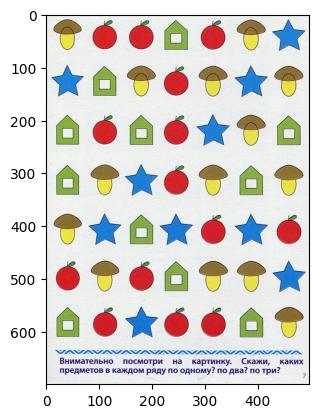

In [21]:
img_rgb = cv2.imread('same_objects.jpg')
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

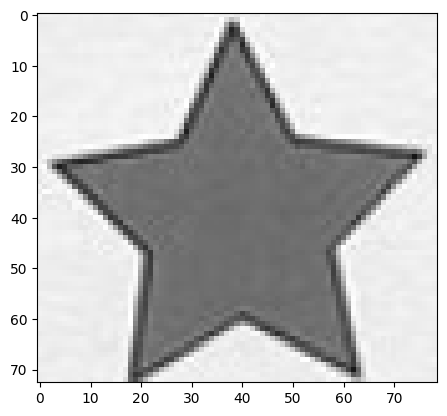

In [22]:
template = cv2.imread('template.jpg', 0)
plt.imshow(cv2.cvtColor(template, cv2.COLOR_BGR2RGB))

208


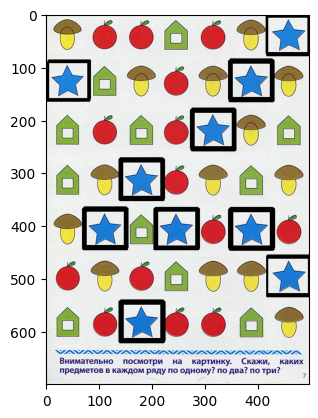

In [23]:
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
template = cv2.imread('template.jpg', 0)
w, h = template.shape[::-1]

res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.7    # Порог сходства
c = 0
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    c += 1
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,0), 2)

print(c)
plt.imshow(cv2.cvtColor(img_rgb, cv2.COLOR_BGR2RGB))

# Задание №2

Заснять на веб-камеру или скачать с интернета цветное видео (файл_1) длинной не менее 50 с, в котором человек производит какие-либо движения (допустимы даже минимальные: необходимо, чтобы его лицо не было зафиксировано в одном положении в течение видео) и при этом большую часть времени смотрит в объектив камеры (но не все время, т.е. человек может отворачиваться, посмотреть в другую сторону). Необходимо к каждому кадру видеопотока применять различные преобразования, так что в видео:
* [0c; 5c): кадр без изменений
* [6c; 10c): размытие с квадратной матрицей из 1 размером 3, 
* [10c; 15c): размытие с квадратной матрицей из 1 размером 5, 
* [15c; 20c): размытие с квадратной матрицей из 1 размером 9. 
* [20c; 25c): размытие с квадратной матрицей из 1 размером 15. 
* [25c; 30c): обнулить цветовой канал первый (B)
* [30c; 35c): обнулить второй цветовой канал (G)
* [35c; 40c): обнулить второй цветовой канал (R)
* [40c; 45с): применить эрозию с ядром размером 3
* [45c; 50с): применить эрозию с ядром размером 5

Записать сохранить модифицированную видеозапись в файл2.

In [ ]:
import cv2
import numpy as np

cap = cv2.VideoCapture('video1.mp4')
fourcc = cv2.VideoWriter_fourcc(*'FMP4')
FPS = 30.0
cols = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))
rows = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))
print(cols, rows)
out = cv2.VideoWriter('video1Mod.mp4', fourcc, FPS, (cols, rows))

# [0c; 5c): кадр без изменений
for seconds in range(0, 5):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            out.write(frame)
        else:
            break

# [5c; 10c): размытие с квадратной матрицей из 1 размером 3
for seconds in range(5, 10):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel_3x3 = np.ones((3, 3), np.float32) / 9.0
            frame = cv2.filter2D(frame, -1, kernel_3x3)
            out.write(frame)
        else:
            break

# [10c; 15c): размытие с квадратной матрицей из 1 размером 5
for seconds in range(10, 15):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel_5x5 = np.ones((5, 5), np.float32) / 25.0
            frame = cv2.filter2D(frame, -1, kernel_5x5)
            out.write(frame)
        else:
            break

# [15c; 20c): размытие с квадратной матрицей из 1 размером 9
for seconds in range(15, 20):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel_9x9 = np.ones((9, 9), np.float32) / 81.0
            frame = cv2.filter2D(frame, -1, kernel_9x9)
            out.write(frame)
        else:
            break

# [20c; 25c): размытие с квадратной матрицей из 1 размером 15
for seconds in range(20, 25):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel_15x15 = np.ones((15, 15), np.float32) / 225.0
            frame = cv2.filter2D(frame, -1, kernel_15x15)
            out.write(frame)
        else:
            break

# [25c; 30c): обнулить первый цветовой канал (B)
for seconds in range(25, 30):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            frame[:, :, 0] = 0  # Обнуляем синий канал
            out.write(frame)
        else:
            break

# [30c; 35c): обнулить второй цветовой канал (G)
for seconds in range(30, 35):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            frame[:, :, 1] = 0  # Обнуляем зеленый канал
            out.write(frame)
        else:
            break

# [35c; 40c): обнулить третий цветовой канал (R)
for seconds in range(35, 40):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            frame[:, :, 2] = 0  # Обнуляем красный канал
            out.write(frame)
        else:
            break

# [40c; 45c): применить эрозию с ядром размером 3
for seconds in range(40, 45):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel = np.ones((3, 3), np.uint8)
            frame = cv2.erode(frame, kernel, iterations=1)
            out.write(frame)
        else:
            break

# [45c; 50c): применить эрозию с ядром размером 5
for seconds in range(45, 59):
    for frames in range(int(FPS)):
        ret, frame = cap.read()
        if ret == True:
            kernel = np.ones((5, 5), np.uint8)
            frame = cv2.erode(frame, kernel, iterations=1)
            out.write(frame)
        else:
            break
    
cap.release()
out.release()

1920 1080


# Задание №3

Написать программу, которая к видео из файла2 применяет признаки Хаара, детектирует лица и обводит их в прямоугольную рамку. Записать полученное видео в файл3. Сделать выводы о том насколько ухудшение качества видеопотока влияет на определение лиц с помощью признаков Хаара.

In [ ]:
cap = cv2.VideoCapture('video1Mod.mp4')

FPS = cap.get(cv2.CAP_PROP_FPS)                 # FPS исходного видео
cols = int(cap.get(cv2.CAP_PROP_FRAME_WIDTH))   # Ширина кадра
rows = int(cap.get(cv2.CAP_PROP_FRAME_HEIGHT))  # Высота кадра

fourcc = cv2.VideoWriter_fourcc(*'MP4V')
out = cv2.VideoWriter('video1Final.mp4', fourcc, FPS, (cols, rows))

while(True):
    # ret - флаг успешного чтения (True/False)
    # img - сам кадр в виде numpy-массива
    ret, img = cap.read()
    
    if ret == True:
        img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        
        # Классификатор для обнаружения лиц
        face_cascade_db = cv2.CascadeClassifier(
            cv2.data.haarcascades + 'haarcascade_frontalface_default.xml'
        )
        
        # Обнаружение лица на изображении
        # scaleFactor - параметр масштабирования изображения
        # minNeighbors - параметр, определяющий качество обнаружения
        faces = face_cascade_db.detectMultiScale(img_gray, scaleFactor=1.1, minNeighbors=20)
        
        # Прямоугольники вокруг обнаруженных лиц
        for (x, y, w, h) in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 0), 2)
        out.write(img)
    else:
        break
    
cap.release()
out.release()